In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega a tabela imortação
imp_fert=pd.read_csv('~/git/BD/temp/imp_fert_mun.csv')
imp_fert.head(1)

,CO_ANO,CO_MES,CO_SH4,CO_PAIS,UF,CO_MUN,KG_LIQUIDO,VL_FOB
0,1997,1,3101,386,SP,3456503,15222,34324


In [2]:
imp_fert.KG_LIQUIDO.sum()/10**12

np.float64(0.566360039176)

# Anos e meses

In [3]:
%run '~/git/BD/Comexstat/function/Verifica_continuidade_tempo.ipynb'

***Função "verifica_continuidade_tempo(comexstat_tab)" disponível***


In [4]:
verifica_continuidade_tempo(imp_fert)

A tabela apresenta todos os anos entre 1997 e 2024.
A tabela apresenta continuidade entre os meses.
As datas vão de 1/1997 a 8/2024.


# Carrega tabelas auxiliares

In [5]:
%run '/home/andre301267/git/BD/Comexstat/function/Extrai-tab_complementares.ipynb'

Variáveis disponíveis: ncm, ncm_sh, pais,uf_mun,uf,via,urf


In [6]:
imp_fert=imp_fert.rename(columns={'SG_UF_NCM':'UF'})

uf=uf.rename(columns={'SG_UF':'UF'})

In [7]:
via.columns

Index(['CO_VIA', 'NO_VIA'], dtype='object')

In [8]:
ncm_sh4=ncm_sh[['CO_SH4','NO_SH4_POR']].drop_duplicates()

In [9]:
t=[ncm_sh4, pais, uf]
for y in t:
    imp_fert=imp_fert.merge(y)

# Descarta colunas sem interesse

In [10]:
# List of strings to check
strings_to_exclude = ['ING','ESP','ESP','SEC','PPE','PPI','FAT','CICI','CGCE','SIIT','ISIC','EXP','ISON','SG_UNID']

# Function to check if any of the strings are in the column name
def should_exclude(column_name, strings):
    return any(s in column_name for s in strings)

# Exclude columns whose names contain any of the strings
imp_fert = imp_fert.loc[:, ~imp_fert.columns.to_series().apply(lambda col_name: should_exclude(col_name, strings_to_exclude))]

print(imp_fert.columns)


Index(['CO_ANO', 'CO_MES', 'CO_SH4', 'CO_PAIS', 'UF', 'CO_MUN', 'KG_LIQUIDO',
       'VL_FOB', 'NO_SH4_POR', 'CO_PAIS_ISOA3', 'NO_PAIS', 'CO_UF', 'NO_UF',
       'NO_REGIAO'],
      dtype='object')


# Verifica SH4

In [11]:
g=imp_fert.groupby('CO_SH4').KG_LIQUIDO.count().reset_index().rename(columns={'KG_LIQUIDO':'#'}).sort_values(by='#',ascending=False)
g

,CO_SH4,#
1,3102,45543
4,3105,34412
3,3104,31747
2,3103,7369
0,3101,2703


In [12]:
import seaborn as sns

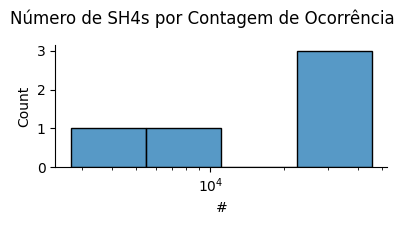

In [13]:
sns.displot(data=g,x='#',log_scale=True,height=2,aspect=2).fig.suptitle('Número de SH4s por Contagem de Ocorrência',y=1.1)
plt.show()

# Filtra SH4

In [14]:
col_foco=['CO_SH4','NO_SH4_POR']
tab_name_SH4=imp_fert.groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by='KG_LIQUIDO', ascending=False).rename(columns={'KG_LIQUIDO':'#registros'})
tab_name_SH4

,CO_SH4,NO_SH4_POR,#registros
1,3102,"Adubos (fertilizantes) minerais ou químicos, a...",45543
4,3105,"Adubos (fertilizantes) minerais ou químicos, c...",34412
3,3104,"Adubos (fertilizantes) minerais ou químicos, p...",31747
2,3103,"Adubos (fertilizantes) minerais ou químicos, f...",7369
0,3101,Adubos (fertilizantes) de origem animal ou veg...,2703


In [15]:
tab_name_SH4=tab_name_SH4[tab_name_SH4.CO_SH4!=3101].sort_values('CO_SH4')

Cria Nick

In [16]:
tab_name_SH4=pd.read_csv('~/git/BD/Comexstat/tab_nick_SH4.csv')

In [17]:
pd.set_option('max_colwidth', 400)

In [18]:
tab_name_SH4

,CO_SH2,CO_SH4,NO_SH4_POR,#registros,nick_sh4
0,31,3102,"Adubos (fertilizantes) minerais ou químicos, azotados",455430,Nitrogenados
1,31,3103,"Adubos (fertilizantes) minerais ou químicos, fosfatados",36845,Fosfatados
2,31,3104,"Adubos (fertilizantes) minerais ou químicos, potássicos",126988,Potássicos
3,31,3105,"Adubos (fertilizantes) minerais ou químicos, contendo dois ou três dos seguintes elementos fertilizantes: azoto (nitrogénio), fósforo e potássio; outros adubos (fertilizantes); produtos do presente capítulo apresentados em tabletes ou formas semelhantes,",275296,NP_NK_KP_NPK


In [19]:
imp_fert=imp_fert.merge(tab_name_SH4[['CO_SH4','nick_sh4']])

In [20]:
imp_fert.KG_LIQUIDO.sum()/10**12

np.float64(0.566214816942)

# UF

In [21]:
imp_fert_g=imp_fert.groupby('UF').KG_LIQUIDO.count().sort_values(ascending=False).reset_index().rename(columns={'KG_LIQUIDO':'count_uf'})
imp_fert_g

,UF,count_uf
0,SP,30582
1,PR,14568
2,RS,13567
3,MG,13133
4,MT,8876
5,GO,8394
6,BA,5365
7,SC,4218
8,MS,3611
9,ES,3101


# CO_PAIS

In [22]:
pais=pd.read_csv('~/git/BD/Comexstat/tab_complementares/PAIS.csv',encoding='Latin-1',sep=';')
pais.columns

Index(['CO_PAIS', 'CO_PAIS_ISON3', 'CO_PAIS_ISOA3', 'NO_PAIS', 'NO_PAIS_ING',
       'NO_PAIS_ESP'],
      dtype='object')

In [23]:
imp_fert_g=imp_fert[imp_fert.CO_ANO==2023].groupby('CO_PAIS').KG_LIQUIDO.count()\
.sort_values(ascending=False).reset_index().rename(columns={'KG_LIQUIDO':'# imp_2023'})
imp_fert_g.merge(pais[['CO_PAIS','CO_PAIS_ISOA3']]).head(10)[['CO_PAIS_ISOA3','# imp_2023']].set_index('CO_PAIS_ISOA3')

,# imp_2023
CO_PAIS_ISOA3,
RUS,1143
CHN,1109
CAN,307
DEU,273
ISR,264
ESP,262
USA,255
BOL,228
MAR,185


In [24]:
imp_fert.columns

Index(['CO_ANO', 'CO_MES', 'CO_SH4', 'CO_PAIS', 'UF', 'CO_MUN', 'KG_LIQUIDO',
       'VL_FOB', 'NO_SH4_POR', 'CO_PAIS_ISOA3', 'NO_PAIS', 'CO_UF', 'NO_UF',
       'NO_REGIAO', 'nick_sh4'],
      dtype='object')

In [25]:
imp_fert.KG_LIQUIDO.sum()/10**12

np.float64(0.566214816942)

In [26]:
imp_fert.columns

Index(['CO_ANO', 'CO_MES', 'CO_SH4', 'CO_PAIS', 'UF', 'CO_MUN', 'KG_LIQUIDO',
       'VL_FOB', 'NO_SH4_POR', 'CO_PAIS_ISOA3', 'NO_PAIS', 'CO_UF', 'NO_UF',
       'NO_REGIAO', 'nick_sh4'],
      dtype='object')

In [27]:
imp_fert=imp_fert.sort_values(by=['CO_ANO','CO_MES','CO_SH4','UF','CO_PAIS']).reset_index(drop=True)

In [28]:
imp_fert.to_csv('~/git/BD/temp/imp_fert_mun_cat.csv',index=False)